######## DATA LOAD
Data loaded
######## GENERAL INFORMATION
######## Total: 
Amount of reviews:  39100
                                       NODE  \
count                                 39100   
unique                                39100   
top     _:node2a2ba8d92275eab071522abfbecd0   
freq                                      1   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

                                                      URL  \
count                                               39100   
unique                                               6741   
top     https://www.walmart.com/reviews/product/931691146   
freq                                                 1540   
mean                       

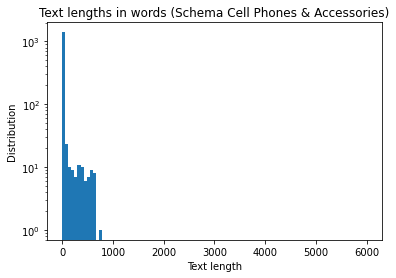

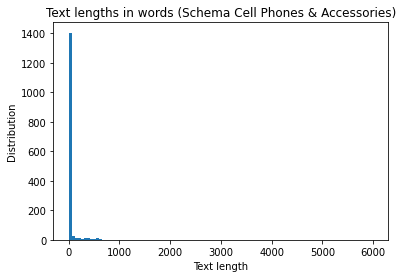

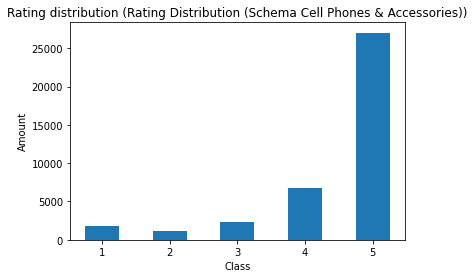

In [1]:
from Scripts import profiling as pf, preprocessing as prep, cleaning as cl
import pandas as pd

print('######## DATA LOAD')
schema_input = '../Data/schema_phone.pkl'
df = pd.read_pickle(schema_input)
print('Data loaded')


print('######## GENERAL INFORMATION')
pf.get_review_count(df)
pf.get_descr(df)


print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))


print('######## DUPLICATION CHECK')
df = cl.remove_duplicates(df)
df = cl.remove_dup_text(df)


print('######## WORD COUNT')
df = pf.create_word_count(df)
pf.get_longest_review(df)
pf.get_shortest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'schema_phone_textlength_raw_logarithmic', 'Schema Cell Phones & Accessories', True)
pf.show_word_length_dist(df, 'schema_phone_textlength_raw', 'Schema Cell Phones & Accessories', False)


print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'schema_phone_class_dist_raw', 'Rating Distribution (Schema Cell Phones & Accessories)')


print('######## DATA SOURCES')
df = pf.get_source_info(df)

In [14]:
df[df.label==3.0]['netloc'].value_counts()

www.walmart.com                1478
www.cnet.com                    367
www.proporta.co.uk               77
www.macworld.co.uk               34
www.audio-technica.com           34
                               ... 
pc-telephone.findmysoft.com       1
www.theitbaby.com                 1
www.copsplus.com                  1
www.slantmagazine.com             1
www.v3.co.uk                      1
Name: netloc, Length: 117, dtype: int64